In [7]:
childDistVec1=[]
scoreVec1=[]
scoreVecVec=[]
childDistVecVec=[]

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
k=5
n=k
G_god=nx.DiGraph(nx.scale_free_graph(2))
G_god=gf.label_conserver(G_god)
qCon=0.8
qMod = 0.4
G_god,G3=gf.network_birth(G_god,n,n,qCon,qMod)

for i in range(0,10):
    k=5
    n=k
    
    G_orig=copy.deepcopy(G_god)
    G1_orig=copy.deepcopy(G_orig)
    G2_orig=copy.deepcopy(G_orig)
    childDistVec1=[]
    scoreVec1=[]
    for m in range(0,20):
        n=n+1
    
        G1,G1_fake=gf.network_birth(G1_orig,1,1,qCon,qMod,iteration = n)
        G2,G2_fake=gf.network_birth(G2_orig,1,1,qCon,qMod,iteration = n)
        G1=gf.label_conserver(G1)
        G2=gf.label_conserver(G2)

        #nx.draw_circular(G,with_labels=True)
        G1_orig=copy.deepcopy(G1)
        G2_orig=copy.deepcopy(G2)
    
        G1_forest=gf.duplication_forest(G1_orig,n+1)
        G2_forest=gf.duplication_forest(G2_orig,n+1)
    

        originalNCScore=gf.original_networks_NC_score(G1_orig,G2_orig,G1_forest,G2_forest,DMCSteps=n,childDistance=n-k)

        
        G1=nx.convert_node_labels_to_integers(G1_orig)
        G2=nx.convert_node_labels_to_integers(G2_orig)
        alignVec,mapped=gf.NF_many_to_one(G1,G2,2,0.8)
        mapping = dict(alignVec)

        G1_mapped=nx.induced_subgraph(G1,list(mapped))
        G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

        #print("Alignment mapping:",alignVec)

        modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n,childDistance=n-k)
        #print("Modified NC Score of Alignment",gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest))
        #print("Original Modified NC Score",originalNCScore)
        print("Quality of Alignment Based off NC Score",n-k,"steps",1-(originalNCScore-modifiedNCScore)/originalNCScore,"orig",originalNCScore,"mod",modifiedNCScore)
        scoreVec1.append(1-(originalNCScore-modifiedNCScore)/originalNCScore)
        childDistVec1.append(n-k)
    scoreVecVec.append(scoreVec1)
    childDistVecVec.append(childDistVec1)

Quality of Alignment Based off NC Score 1 steps 0.6190476190476191 orig 1.0 mod 0.6190476190476191
Quality of Alignment Based off NC Score 2 steps 0.46153846153846145 orig 0.65 mod 0.3
Quality of Alignment Based off NC Score 3 steps 0.3809523809523808 orig 0.5303030303030304 mod 0.20202020202020202
Quality of Alignment Based off NC Score 4 steps 0.29210526315789476 orig 0.5277777777777778 mod 0.1541666666666667
Quality of Alignment Based off NC Score 5 steps 0.23748597081930412 orig 0.5192307692307693 mod 0.12331002331002328
Quality of Alignment Based off NC Score 6 steps 0.28937177280550774 orig 0.3952380952380952 mod 0.1143707482993197
Quality of Alignment Based off NC Score 7 steps 0.25659303357877683 orig 0.38968253968253974 mod 0.09998982498982495
Quality of Alignment Based off NC Score 8 steps 0.25922272637601096 orig 0.3771577380952381 mod 0.09776785714285711
Quality of Alignment Based off NC Score 9 steps 0.25732638701109845 orig 0.35315126050420176 mod 0.09087513793396146
Qual

[0.062211043338855965, 0.6491762379576667, 0.9658868235909966]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


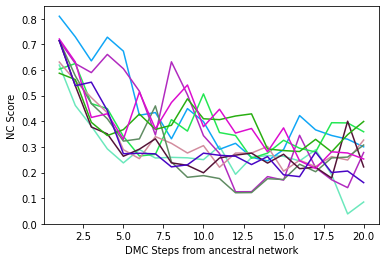

In [10]:
import random
rgb = list(np.random.rand(len(scoreVecVec),3))
print(list(rgb[1]))
for i in range(0,len(scoreVecVec)):
    print("ok")
    plt.xlabel("DMC Steps from ancestral network")
    plt.ylabel("NC Score")
    plt.plot(childDistVecVec[i],scoreVecVec[i],'-',c=list(rgb[i]))
plt.savefig("plots.pdf")

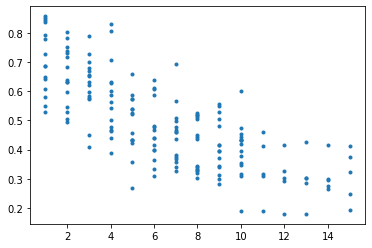

In [6]:
plt.plot(childDistVec,scoreVec,'.')
plt.show()

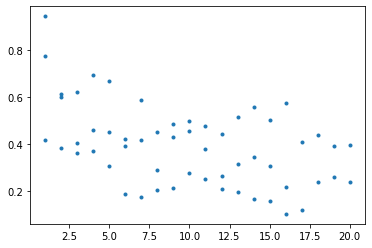

In [16]:
plt.plot(childDistVec1,scoreVec1,'.')
plt.show()

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]
4


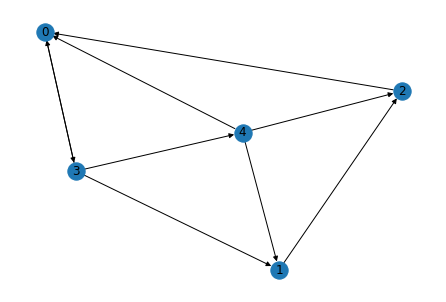

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
n=5
p=0.4
node=4
G_o=gf.gnp_random_graph(n,p,directed=True)
print(G_o.in_degree(node)+G_o.out_degree(node))
origDegree=G_o.in_degree(node)+G_o.out_degree(node)
nx.draw(G_o,with_labels=True)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


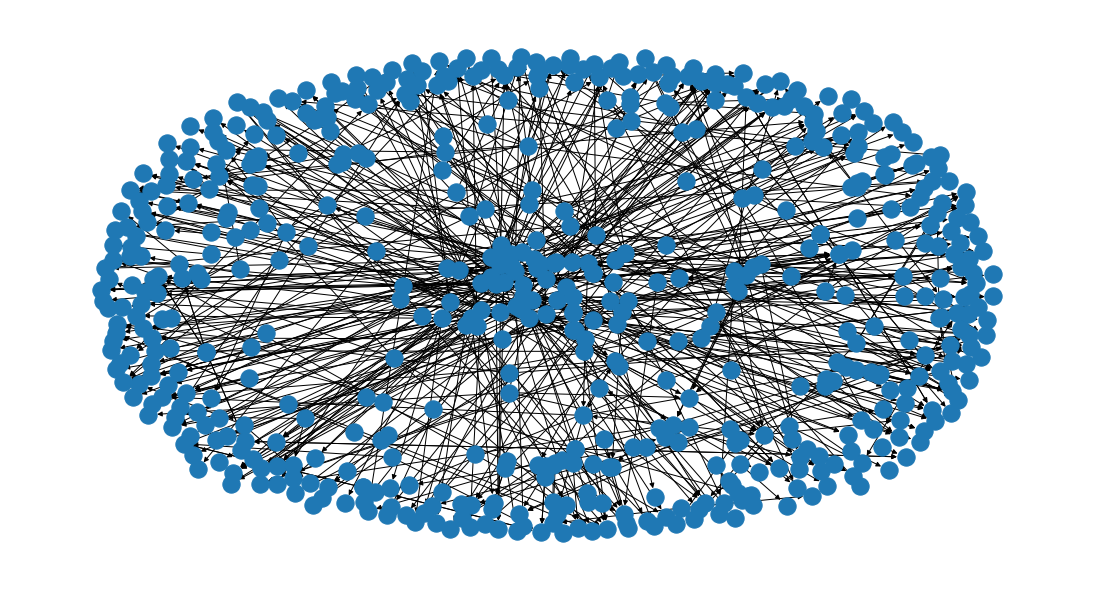

In [2]:
qCon=0
qMod = 0.7
G=G_o
iterations=1000
#G=gf.dmc_modified(G,qCon,qMod,iterations=50)


prod=origDegree

for i in range(0,iterations):
    prod = prod*(1-qMod/(2*(len(list(G.nodes))+i))+(2-qMod)/(2*(len(list(G.nodes))+i)))
    #print(G.out_degree(node)+G.in_degree(node)+(G.out_degree(node)+G.in_degree(node))/len(list(G.nodes))) 
    G=gf.dmc_modified_helper(G,qCon,qMod,iteration=i+1)
    #print(G.out_degree(0)+G.in_degree(0))
    for j in list(G.nodes()):
      if (G.out_degree(j)==0 and G.in_degree(j)==0):
        G.remove_node(j)
      elif G.out_degree(j)==1 and G.in_degree(j)==1 and (j,j) in list(G.edges):
        G.remove_node(j)
    #print(G.out_degree(node)+G.in_degree(node))
    
plt.figure(figsize=(15, 8))
nx.draw(G)
#print(len(list(G.nodes)))
print(len(list(G.nodes)))



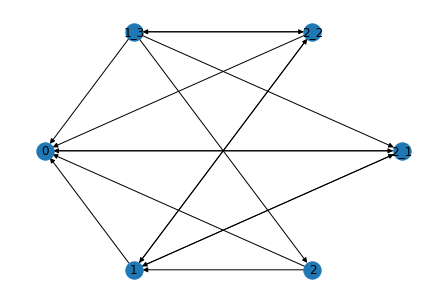

In [76]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
n=3
p=0.7

qCon=0
qMod=0.1
G=gf.gnp_random_graph(n,p,directed=True)
G,G3=gf.network_birth(G,n,n,qCon,qMod)
G1,G2=gf.network_birth(G,2,2,qCon,qMod,iteration = n)

nx.draw_shell(G,with_labels=True)



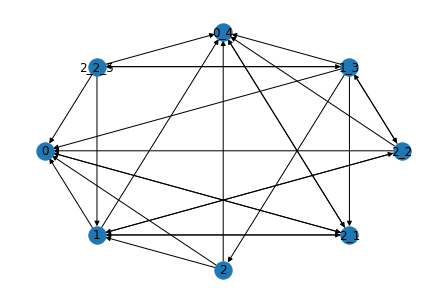

In [77]:
nx.draw_shell(G1,with_labels=True)

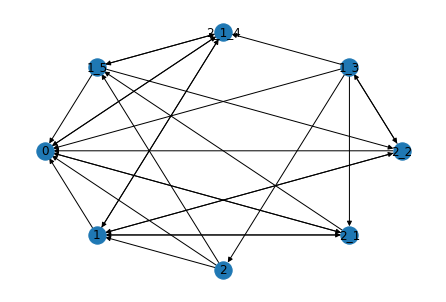

In [78]:
nx.draw_shell(G2,with_labels=True)



In [79]:
G_anc=gf.dmc_anc_rec(G1,G2,qMod,qCon)


{0: array([1.0000000e+00, 1.4702742e-08]), 1: array([0.809017  , 0.58778526]), 2: array([0.30901698, 0.95105655]), '2_1': array([-0.30901702,  0.95105649]), '2_2': array([-0.80901699,  0.58778526]), '1_3': array([-9.99999988e-01, -7.27200340e-08]), '0_4': array([-0.80901693, -0.58778529]), '2_2_5': array([-0.30901711, -0.95105646]), '2_1_4': array([ 0.30901713, -0.95105646]), '1_5': array([ 0.80901694, -0.58778529])}


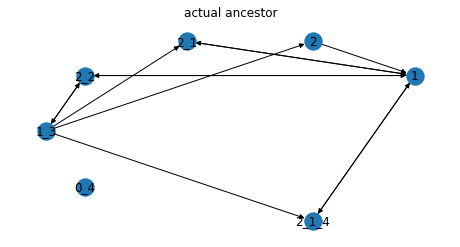

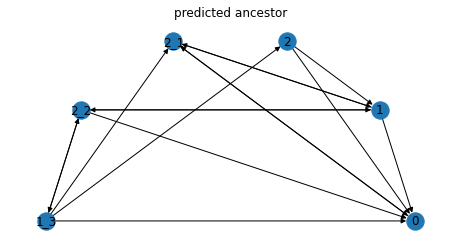

In [80]:
#print(len(G.nodes))
Gjoin=nx.compose(G1,G2)

pos = nx.circular_layout(Gjoin)
print(pos)
plt.figure(figsize=(8,4))
plt.title("actual ancestor")
nx.draw(G_anc,with_labels=True,pos=pos)
plt.figure(figsize=(8,4))
plt.title("predicted ancestor")
nx.draw(G,with_labels=True,pos=pos)